# Code session 7

## Escopo

- Teoria da Aproximação > Ajuste de Curvas

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Regressão Linear

### `linregress`

A regressão linear é o modelo mais básico para realizar ajuste de dados e frequentemente aplicado em estudos estatísticos. Em Python, a regressão linear pode ser realizada com a função `linregress`. Esta função calcula a regressão linear por mínimos quadrados (a rigor, o termo deveria ser traduzido como _quadrados mínimos_) para dois conjuntos de medição. 

Os argumentos de entrada obrigatórios desta função são: 

1. o primeiro conjunto de dados `x` (lista ou objeto tipo _array_)
2. o segundo conjunto de dados `y` (lista ou objeto tipo _array_)

Os argumentos de saída principais são

- `slope`: coeficiente angular da reta obtida pela regressão linear
- `intercept`: coeficiente linear da reta obtida pela regressão linear
- `rvalue`: valor do coeficiente de correlação
- `pvalue`: valor-_p_ do teste de hipótese

Por enquanto, desconsideraremos o valor-_p_.

**Nota:** para obter o valor do _coeficiente de determinação_ $R^2$, o valor de `rvalue` deve ser elevado ao quadrado, i.e. `R2 = rvalue**2.`

Como importar a função?

In [2]:
from scipy.stats import linregress

### Problema 1

A tabela a seguir lista a massa $M$ e o consumo médio $C$ de automóveis fabricados pela Ford e Honda em 2008. Faça um ajuste linear $C = b + aM$ aos dados e calcule o desvio padrão. 

modelo | massa (kg) | C (km/litro)
---|---|---
Focus| 1198 | 11.90
Crown Victoria| 1715 | 6.80
Expedition| 2530 | 5.53
Explorer| 2014 | 6.38
F-150| 2136 | 5.53
Fusion| 1492 | 8.50
Taurus| 1652 | 7.65
Fit| 1168 | 13.60
Accord| 1492 | 9.78
CR-V| 1602 | 8.93
Civic| 1192 | 11.90
Ridgeline| 2045 | 6.38

**Nota**: esta tabela está disponível em formato .csv no arquivo `file-cs7-autos.csv`.

### Resolução

Vamos ler o arquivo de dados e convertê-lo em uma matriz.

In [5]:
# fname: nome do arquivo
# delimiter: separador dos dados 
# skiprows: ignora linhas do arquivo (aqui, estamos removendo a primeira)
# usecols: colunas a serem lidas (aqui, estamos lendo a 2a. e 3a. colunas)
dados = np.loadtxt(fname='file-cs7-autos.csv',delimiter=',',skiprows=1,usecols=(1,2))
print(dados)

[[1198.     11.9 ]
 [1715.      6.8 ]
 [2530.      5.53]
 [2014.      6.38]
 [2136.      5.53]
 [1492.      8.5 ]
 [1652.      7.65]
 [1168.     13.6 ]
 [1492.      9.78]
 [1602.      8.93]
 [1192.     11.9 ]
 [2045.      6.38]]


Armazenamos os _arrays_ devidamente:

In [6]:
M = dados[:,0] # massa
C = dados[:,1] # consumo

Fazemos a regressão linear:

In [7]:
a,b,R, p_value, std_err = linregress(M,C)
print(f'Regressão linear executada com a = {a:.3f}, b = {b:.3f} e R2 = {R*R:.2f}')

Regressão linear executada com a = -0.006, b = 18.410 e R2 = 0.83


Enfim, podemos visualizar o resultado: 

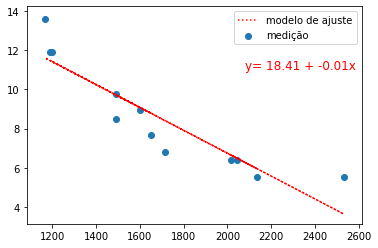

In [8]:
C2 = b + a*M # ajuste
mod = plt.plot(M,C2,'r:'); # modelo
med = plt.scatter(M,C); # medição
plt.legend({'modelo de ajuste':mod, 'medição':med}); # legenda

plt.annotate('y= {0:.2f} + {1:.2f}x'.format(b,a),(2080,11),fontsize=12,c='r');

## Medindo o desvio padrão do ajuste por mínimos quadrados 

Para calcular o desvio padrão do ajuste, precisamos reconhecer o número de amostras $n$, o número de parâmetros do modelo de ajuste $m$ e calcular a soma $S$ dos quadrados. A fórmula utilizada é a seguinte: 

$$\sigma = \sqrt{ \dfrac{S}{n-m} },$$


onde $S = \sum\limits_{k=0}^n [y_i - \phi(x_i)]^2$.

Notemos que se $n = m$ (caso da interpolação), $\sigma = \infty$, i.e. seria indefinido, já que o denominador anular-se-ia. 

O modelo de ajuste $\phi(x)$ é considerado polinomial. Então, no caso da regressão linear, temos apenas 2 parâmetros: o coeficiente linear e o angular.

Sabemos que $m=2$. Agora, resta usar $n$ e calcular $S$. Isto é tudo de que precisamos para calcular $\sigma$ para o nosso problema. 

In [10]:
n = M.size # número de amostras
m = 2 # número de parâmetros

O cálculo de $S$ pode ser feito da seguinte maneira:

In [11]:
S = np.sum( (C - C2)*(C - C2) ) # soma dos quadrados (resíduos)

Enfim, $\sigma$ será dado por:

In [12]:
sigma = np.sqrt(S/(n-m)) # desvio padrão
print(f'σ = {sigma:.3f}')

σ = 1.164


## Ajuste polinomial (linear)

O ajuste de formas lineares de ordem superior (polinomial) pode ser realizado por meio da função `polyfit`.


### `polyfit`

Esta função ajusta um polinômio de grau $g$ à tabela de dados.

Os argumentos de entrada obrigatórios desta função são: 

1. o primeiro conjunto de dados `x` (lista ou objeto tipo _array_)
2. o segundo conjunto de dados `y` (lista ou objeto tipo _array_)
3. o grau do polinômio `g`

O principal argumento de saída é:

- `p`: lista dos g+1 coeficientes do modelo (ordenados do maior para o menor grau)


Como importá-la? 

```python 
from numpy import polyfit
```

Como já importamos o `numpy`, basta chamar a função com:

```python
np.polyfit(x,y,deg)
```

### Problema 2 

Refaça o Problema 1 ajustando os dados com polinômios de grau 2, 3, 4 e 5 e plote os gráficos dos modelos ajustados aos dados em apenas uma figura.  

#### Resolução

Uma vez que já temos as variáveis armazenadas na memória, basta criarmos os ajustes.

In [13]:
p2 = np.polyfit(M,C,2)
p3 = np.polyfit(M,C,3) 
p4 = np.polyfit(M,C,4) 
p5 = np.polyfit(M,C,5) 

Para imprimir a lista dos coeficientes, basta fazer:

In [14]:
print(p2)
print(p3)
print(p4)
print(p5)

[ 5.26020025e-06 -2.45829326e-02  3.41991952e+01]
[-1.89135665e-09  1.56050998e-05 -4.27556580e-02  4.44279113e+01]
[ 3.37176332e-12 -2.66523211e-08  8.21041425e-05 -1.20066752e-01
  7.72222694e+01]
[-3.12853412e-14  2.86132736e-10 -1.03205187e-06  1.83990614e-03
 -1.63096318e+00  5.87812297e+02]


Para plotarmos as curvas, devemos nos atentar para o grau dos modelos. Podemos criá-las da seguinte forma:

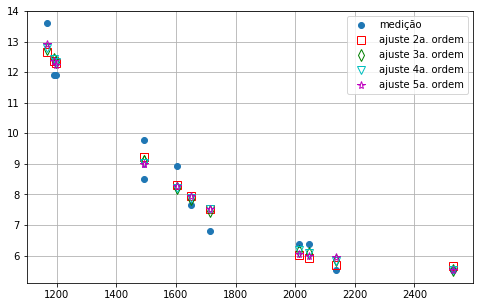

In [22]:
C22 = p2[0]*M**2 + p2[1]*M    + p2[2] # modelo quadrático
C23 = p3[0]*M**3 + p3[1]*M**2 + p3[2]*M    + p3[3] # modelo cúbico
C24 = p4[0]*M**4 + p4[1]*M**3 + p4[2]*M**2 + p4[3]*M    + p4[4] # modelo de quarta ordem
C25 = p5[0]*M**5 + p5[1]*M**4 + p5[2]*M**3 + p5[3]*M**2 + p5[4]*M + p5[5] # modelo de quinta ordem

plt.figure(figsize=(8,5))
plt.grid(True)
med = plt.plot(M,C,'o', ms=6); # medição
mod2 = plt.plot(M,C22,'rs',ms=8, markerfacecolor='None'); # modelo 2
mod3 = plt.plot(M,C23,'gd',ms=8, markerfacecolor='None'); # modelo 3
mod4 = plt.plot(M,C24,'cv',ms=8, markerfacecolor='None'); # modelo 4
mod5 = plt.plot(M,C25,'m*',ms=8, markerfacecolor='None'); # modelo 5

plt.legend(('medição',
           'ajuste 2a. ordem',
           'ajuste 3a. ordem',
           'ajuste 4a. ordem',
           'ajuste 5a. ordem'));

#### Exercício complementar 

Escreva uma função genérica que recebe a tabela de dados e o grau do modelo polinomial de ajuste e retorna os coeficientes do modelo, o desvio padrão do ajuste e os gráficos de dispersão conjuntamente com os dos modelos de ajuste.

### Problema 3

A intensidade de radiação de uma substância radioativa foi medida em intervalos semestrais. A tabela de valores está disponível no arquivo `file-cs7-radiacao.csv`, onte $t$ é o tempo e $\gamma$ é a intensidade relativa de radiação. Sabendo que a radioatividade decai exponencialmente com o tempo, $\gamma(t) = ate^{-bt}$, estime a meia-vida radioativa (tempo no qual $\gamma$ atinge metade de seu valor) da substância. 

#### Resolução

Primeiramente, vamos ler o arquivo.

In [26]:
dados = np.loadtxt(fname='file-cs7-radiacao.csv',delimiter=',',skiprows=1)

Agora, vamos coletar os dados e plotá-los apenas para verificar o comportamento da dispersão.

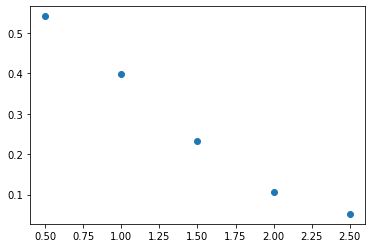

In [27]:
t = dados[:,0]
g = dados[:,1]
plt.plot(t,g,'o');

#### Teste de alinhamento 

Para ajustarmos um modelo não-linear à exponencial, antes precisamos convertê-la a uma forma linear, ou seja, linearizá-la. Para isso, aplicamos $\log$ (nome da função _logaritmo natural_ em Python) em ambos os lados da função. Ao deslocar o termo $t$ fora da exponencial para o lado esquerdo da equação, teremos:

$$\log\left(\frac{\gamma}{t}\right) = \log(a) - bt$$

Definindo $z = \log(\frac{\gamma}{t})$, $x = \log(a)$, podemos agora fazer uma regressão linear nas variáveis $t$ e $z$ para o modelo 

$$z = x - bt$$

Agora, plotando a dispersão no plano $(t,z)$, verificamos se a curva é aproximadamente uma reta.  

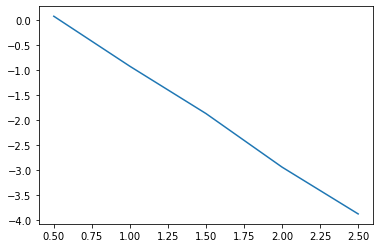

In [28]:
z = np.log(g/t)
plt.plot(t,z);

Como se vê, o teste de alinhamento mostra que a função exponencial é um modelo não-linear satisfatório para modelar o comportamento físico em questão.

Computando a regressão linear, temos:

In [29]:
b,x,R, p_value, std_err = linregress(t,z)
print(f'Regressão linear executada com inclinação = {b:.3f}, interceptação = {x:.3f} e R2 = {R*R:.2f}')

Regressão linear executada com inclinação = -1.984, interceptação = 1.072 e R2 = 1.00


Vemos que, de fato, as variáveis têm uma altíssima correlação, visto que $R^2 \approx 1$. Agora, para plotar o modelo de ajuste, recuperamos o valor de $a$ operando inversamente e o usamos na curva do modelo para comparar com os dados experimentais.

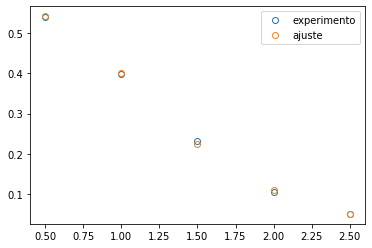

In [30]:
a = np.exp(x); # recuperando parâmetro de ajuste
mod = lambda t: a*t*np.exp(b*t)

plt.plot(t,g,'o',mfc="None");
plt.plot(t,mod(t),'o',mfc="None");
plt.legend(('experimento','ajuste'));

O modelo está bem ajustado. Para estimar a meia-vida da substância, devemos encontrar o instante de tempo $t_m$  tal que $\gamma(t_m) = 0.5\gamma_0$. Então, notemos que: 

$$\gamma(t_m) = at_me^{-bt_m} \Rightarrow 0.5\gamma_0 = at_me^{-bt_m}$$

Todavia, não conseguimos uma relação explícita para $t_m$, fato que nos leva a resolver um segundo problema de determinação de raízes do tipo $f(t_m) = 0$ com 


$$f(t_m) = at_me^{-bt_m} - 0.5\gamma_0$$

Vamos resolver este problema usando a função `fsolve` do módulo `scipy.optimize`, mas antes precisamos passar a ela uma estimativa inicial. Rapidamente, façamos uma análise gráfica da curva $f(t_m)$ para $t_m = [0,2]$ (este intervalo é obtido após algumas plotagens prévias).

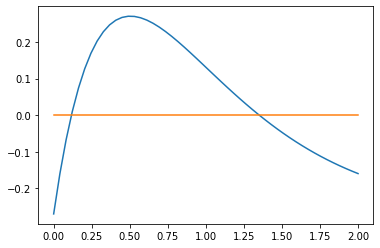

In [32]:
f = lambda tm: mod(tm) - 0.5*g[0]
ttm = np.linspace(0,2)
plt.plot(ttm,f(ttm),ttm,0*f(ttm));

Existem duas raízes no intervalo. Porém, observando os valores tabelados de $t$, é fácil ver que o valor para a condição inicial deve ser maior do que $t_0 = 0.5$ e, portanto, mais próximo da segunda raiz no gráfico. Então, escolhamos para `fsolve` o valor inicial de $t_m^0 = 1.25$.

In [33]:
from scipy.optimize import fsolve 

tm = fsolve(f,1.25)
print(f'Meia-vida localizada em tm = {tm[0]:.3f}.')

Meia-vida localizada em tm = 1.351.


Uma última verificação mostra que este valor de $t_m$ é condizente com os dados experimentais, pois o seguinte erro é pequeno.

In [34]:
mod(tm) - 0.5*g[0]

array([1.11022302e-16])